#  Bank Marketing  

## *Abstract:*
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## *Data Set Information:*
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## *Attribute Information:*
### Bank client data:

- Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
- Related with the last contact of the current campaign:
- Contact: contact communication type (categorical: 'cellular','telephone')
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar',…, 'nov', 'dec')
- Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### *Other attributes:*
- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client   was not previously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')
### *Output variable (desired target):*
- y: has the client subscribed a term deposit? (binary: 'yes', 'no')

# 1- Import libararies:

In [145]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.cluster import k_means
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# 2- Read data:

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\bank.csv" , sep=",", encoding='utf-8')
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [3]:
df.columns = [col.capitalize() for col in df.columns]
df.head(10)

Age         Job   Marital  Education Default  Balance Housing Loan  \
0   59      admin.   married  secondary      no     2343     yes   no   
1   56      admin.   married  secondary      no       45      no   no   
2   41  technician   married  secondary      no     1270     yes   no   
3   55    services   married  secondary      no     2476     yes   no   
4   54      admin.   married   tertiary      no      184      no   no   
5   42  management    single   tertiary      no        0     yes  yes   
6   56  management   married   tertiary      no      830     yes  yes   
7   60     retired  divorced  secondary      no      545     yes   no   
8   37  technician   married  secondary      no        1     yes   no   
9   28    services    single  secondary      no     5090     yes   no   

   Contact  Day Month  Duration  Campaign  Pdays  Previous Poutcome Deposit  
0  unknown    5   may      1042         1     -1         0  unknown     yes  
1  unknown    5   may      1467         1     -1         0  unknown     yes  
2  unknown    5   may      1389         1     -1         0  unknown     yes  
3  unknown    5   may       579         1     -1         0  unknown     yes  
4  unknown    5   may       673         2     -1         0  unknown     yes  
5  unknown    5   may       562         2     -1         0  unknown     yes  
6  unknown    6   may      1201         1     -1         0  unknown     yes  
7  unknown    6   may      1030         1     -1         0  unknown     yes  
8  unknown    6   may       608         1     -1         0  unknown     yes  
9  unknown    6   may      1297         3     -1         0  unknown     yes

# 3- Exploratory Data Analysis(EDA):

In [4]:
df.dtypes

Age           int64
Job          object
Marital      object
Education    object
Default      object
Balance       int64
Housing      object
Loan         object
Contact      object
Day           int64
Month        object
Duration      int64
Campaign      int64
Pdays         int64
Previous      int64
Poutcome     object
Deposit      object
dtype: object

In [5]:
df.describe(include=['object'])

Job  Marital  Education Default Housing   Loan   Contact  \
count        11162    11162      11162   11162   11162  11162     11162   
unique          12        3          4       2       2      2         3   
top     management  married  secondary      no      no     no  cellular   
freq          2566     6351       5476   10994    5881   9702      8042   

        Month Poutcome Deposit  
count   11162    11162   11162  
unique     12        4       2  
top       may  unknown      no  
freq     2824     8326    5873

In [7]:
fig = px.pie(df, values=np.ones(11162), names='Education', title='Education',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        11162 non-null  int64 
 1   Job        11162 non-null  object
 2   Marital    11162 non-null  object
 3   Education  11162 non-null  object
 4   Default    11162 non-null  object
 5   Balance    11162 non-null  int64 
 6   Housing    11162 non-null  object
 7   Loan       11162 non-null  object
 8   Contact    11162 non-null  object
 9   Day        11162 non-null  int64 
 10  Month      11162 non-null  object
 11  Duration   11162 non-null  int64 
 12  Campaign   11162 non-null  int64 
 13  Pdays      11162 non-null  int64 
 14  Previous   11162 non-null  int64 
 15  Poutcome   11162 non-null  object
 16  Deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


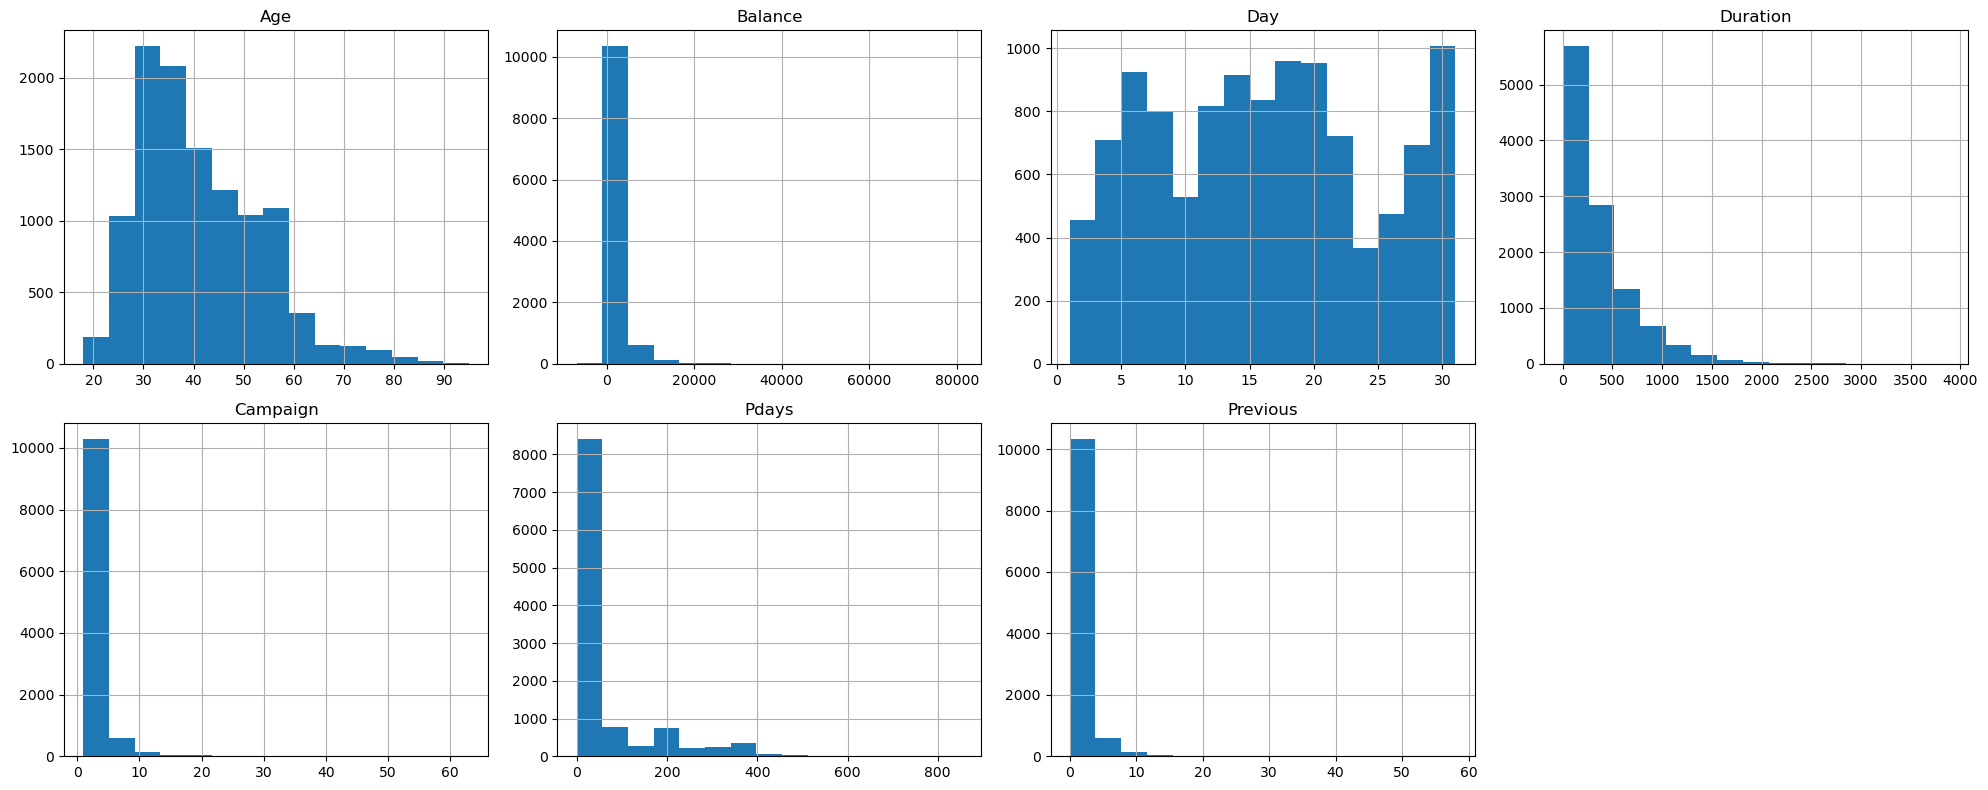

In [9]:
# Plotting histograms for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
num_rows = int(len(numerical_features) / 4) + (len(numerical_features) % 4 > 0)
df[numerical_features].hist(bins=15, figsize=(20, num_rows * 4), layout=(num_rows, 4))
plt.tight_layout()
plt.show()

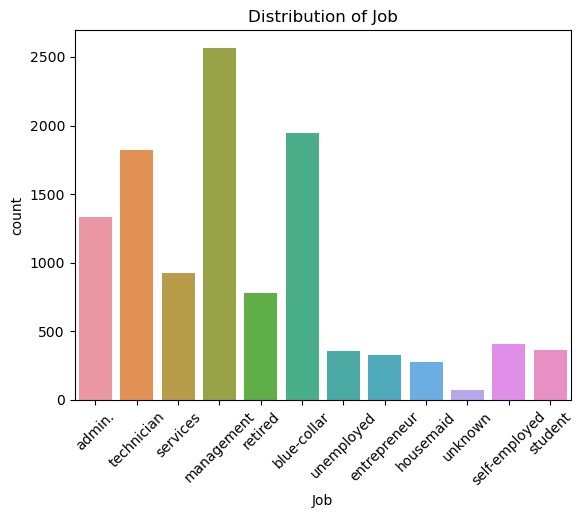

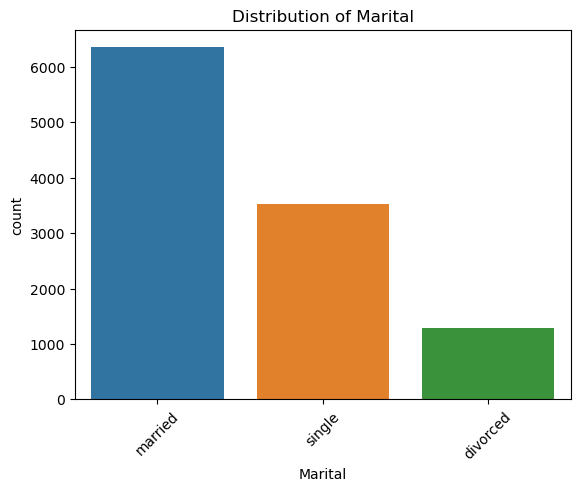

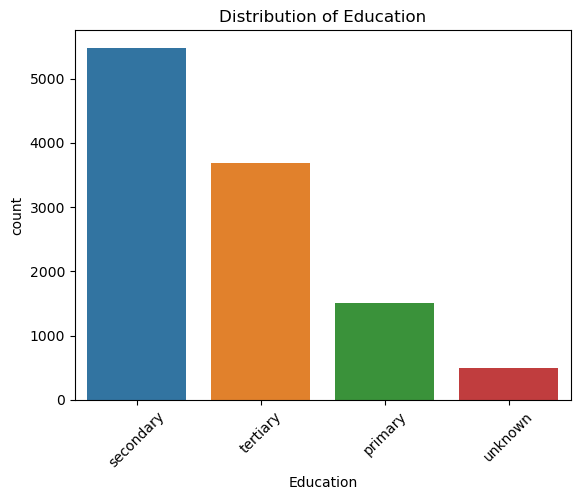

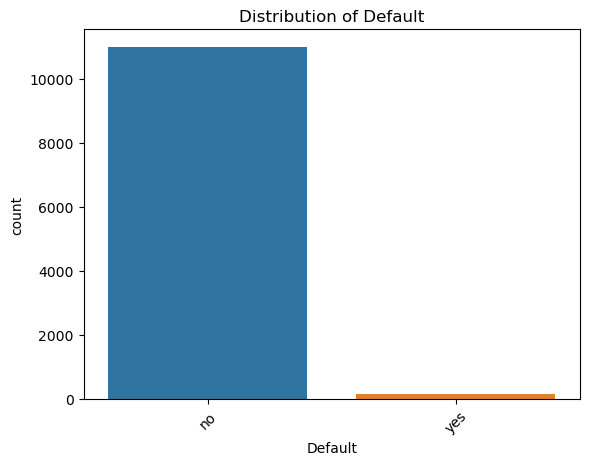

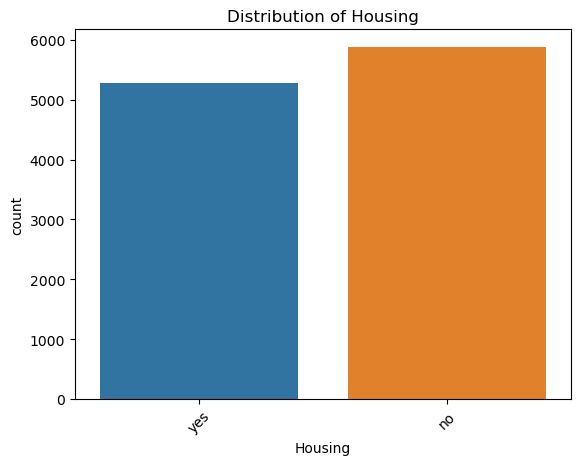

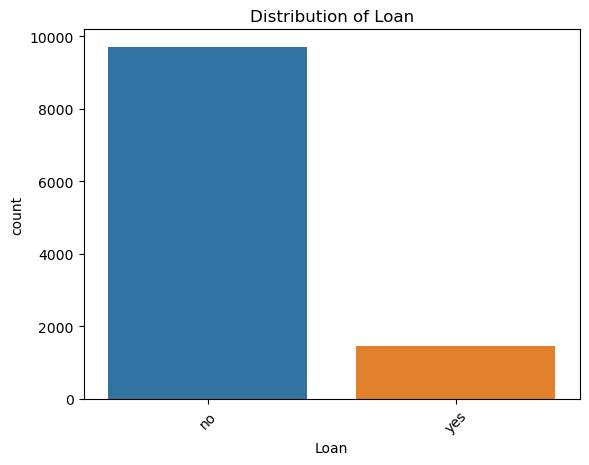

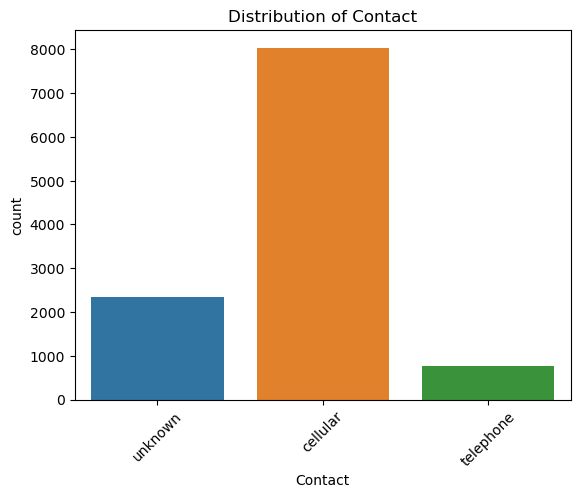

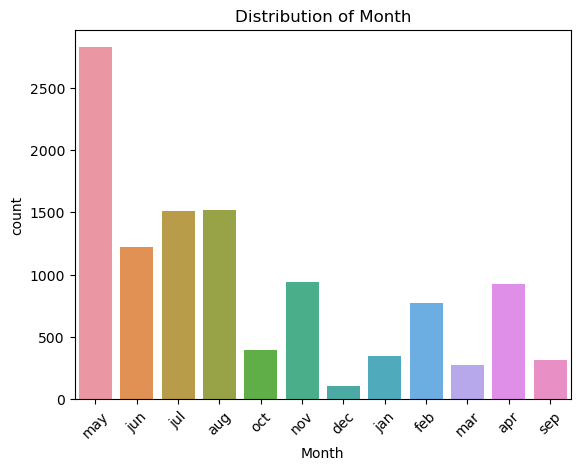

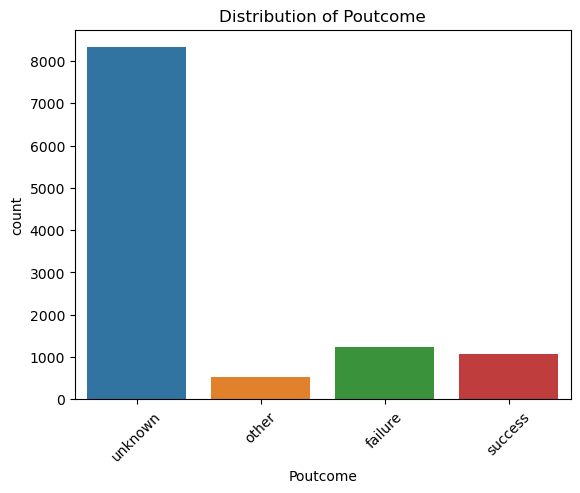

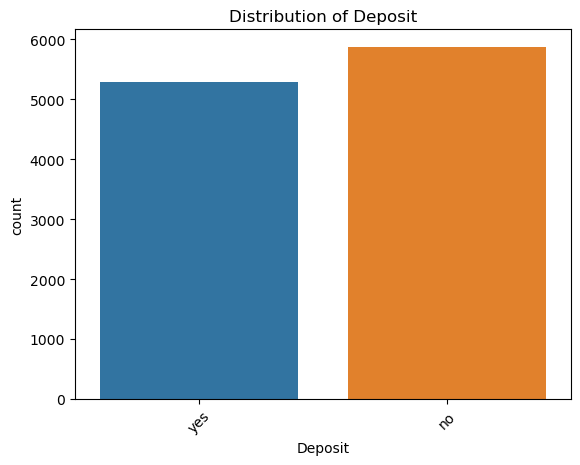

In [10]:
# Plotting count plots for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [12]:
fig = px.pie(df, values=np.ones(11162), names='Housing', title='Housing',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()

<Axes: xlabel='Duration', ylabel='Density'>

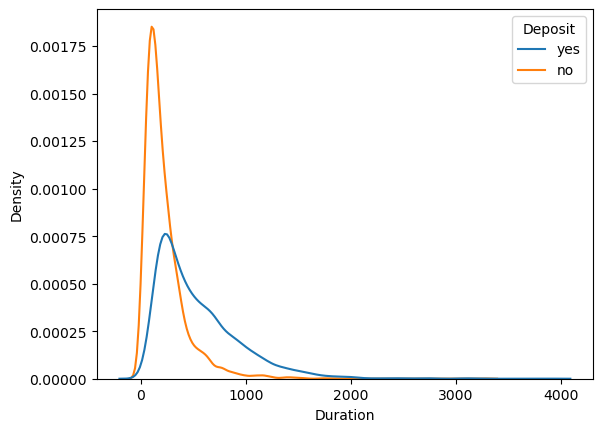

In [13]:
sns.kdeplot(x="Duration",data =df,hue ="Deposit", color= 'rosybrown')

<Axes: xlabel='Poutcome', ylabel='count'>

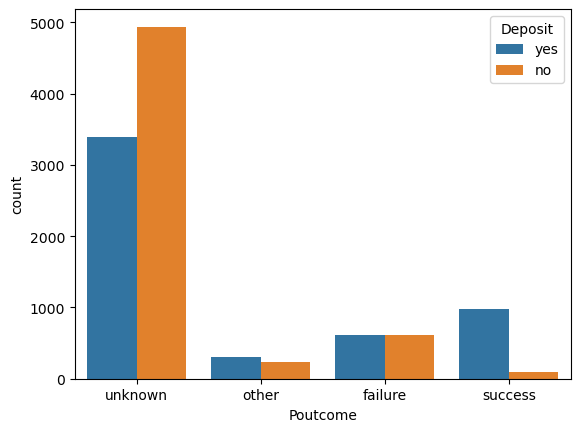

In [14]:
sns.countplot(x="Poutcome", data=df, hue="Deposit" )

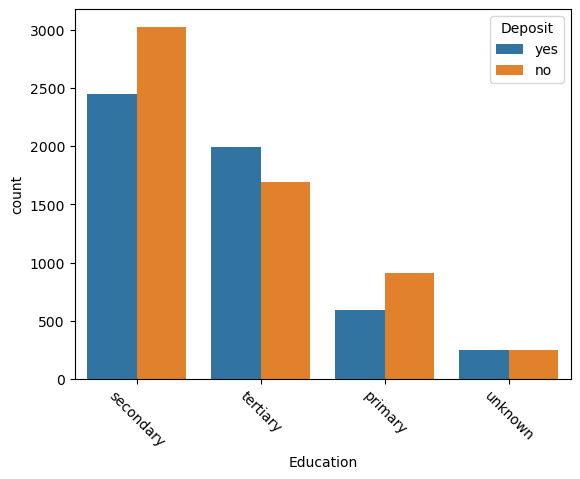

In [15]:
sns.countplot(x="Education", data=df, hue="Deposit")
plt.xticks(rotation=-45)
plt.show()

<Axes: xlabel='Month', ylabel='Balance'>

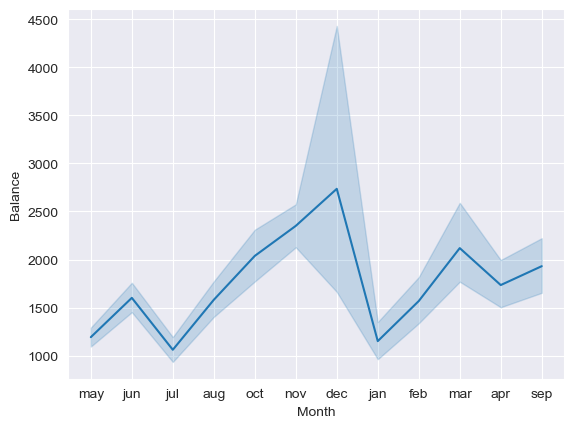

In [16]:
sns.set_style("darkgrid")
sns.lineplot(x="Month",y="Balance",data=df)

In [17]:
df.head()

Age         Job  Marital  Education Default  Balance Housing Loan  Contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   Day Month  Duration  Campaign  Pdays  Previous Poutcome Deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [18]:
fig = px.scatter(df, x="Job", y="Balance", color="Balance",size="Day") 

fig.show()


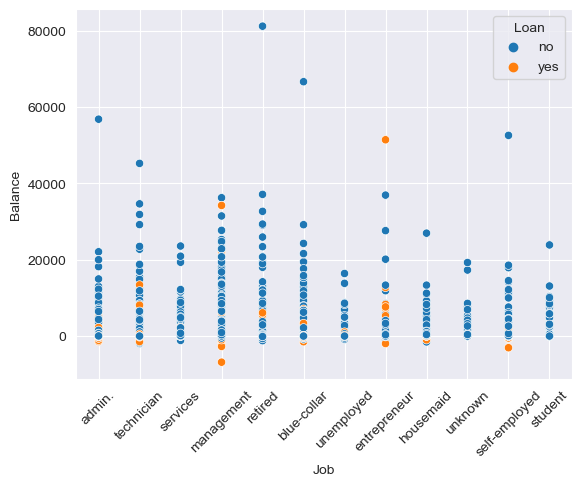

In [19]:
sns.scatterplot(x="Job",y="Balance",data=df,hue="Loan")
plt.xticks(rotation=45)
plt.show()


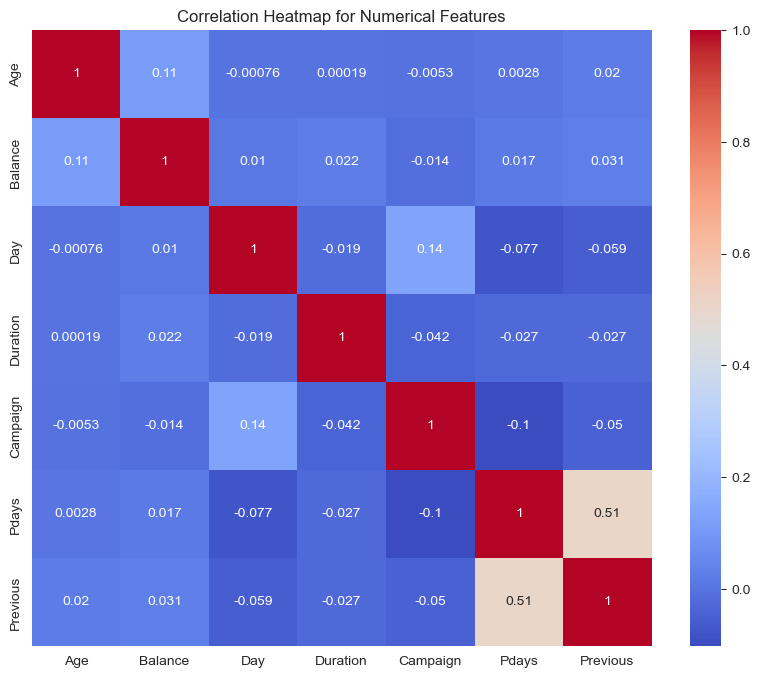

In [20]:
# Set the size of the plot
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
# Show the plot
plt.show()

# 3- Preprocessing data:

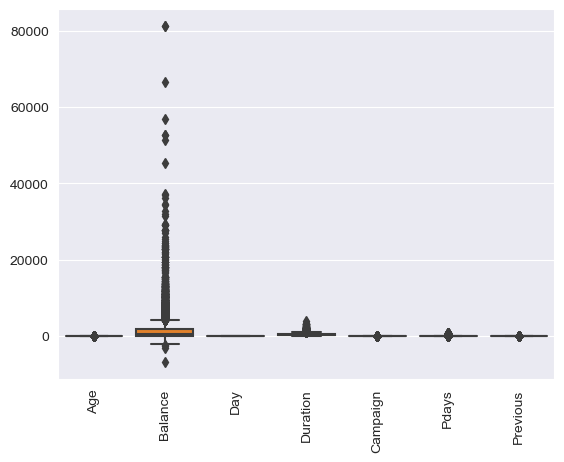

In [21]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [22]:
#detect the outliers
upper_limit=df["Balance"].mean()+3*df["Balance"].std()
lower_limit=df["Balance"].mean()-3*df["Balance"].std()
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 11204.778501400662
lower_limit -8147.701454276492


In [23]:
#show it
outliers=df.loc[((df["Balance"]>upper_limit)|(df["Balance"]<lower_limit))]
outliers

Age         Job   Marital  Education Default  Balance Housing Loan  \
170     27  management    single   tertiary      no    12956     yes   no   
185     46  management  divorced   tertiary      no    14481     yes   no   
692     42  technician   married   tertiary      no    14282     yes   no   
771     32  technician    single   tertiary      no    34646      no   no   
861     60     unknown   married    unknown      no    17297      no   no   
...    ...         ...       ...        ...     ...      ...     ...  ...   
10827   55  management   married   tertiary      no    13578      no   no   
10845   31  management   married   tertiary      no    22867     yes   no   
10927   31  technician    single  secondary      no    31868      no   no   
10983   53  management   married   tertiary      no    20772      no   no   
11030   34  technician    single  secondary      no    18777     yes   no   

         Contact  Day Month  Duration  Campaign  Pdays  Previous Poutcome  \
170      unknown   29   may       789         3     -1         0  unknown   
185      unknown   30   may      1269         1     -1         0  unknown   
692     cellular    6   aug       649         4     -1         0  unknown   
771    telephone   13   aug       618         9     -1         0  unknown   
861     cellular   26   aug       664        11     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
10827   cellular   29   oct       247         2     -1         0  unknown   
10845    unknown   27   may       241         2     -1         0  unknown   
10927  telephone   14   aug        34         6     -1         0  unknown   
10983   cellular    4   feb       715         1     -1         0  unknown   
11030   cellular   18   nov       535         1     -1         0  unknown   

      Deposit  
170       yes  
185       yes  
692       yes  
771       yes  
861       yes  
...       ...  
10827      no  
10845      no  
10927      no  
10983      no  
11030      no  

[173 rows x 17 columns]

In [24]:
#removing the outliers
df=df.loc[(df["Balance"]<upper_limit)&(df["Balance"]>lower_limit)]
print(len(df),"\n",len(df))

10989 
 10989


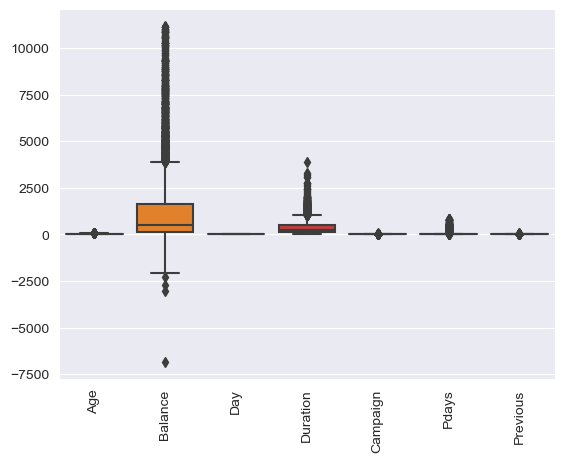

In [25]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [26]:
#missing values
df.isnull().sum()

Age          0
Job          0
Marital      0
Education    0
Default      0
Balance      0
Housing      0
Loan         0
Contact      0
Day          0
Month        0
Duration     0
Campaign     0
Pdays        0
Previous     0
Poutcome     0
Deposit      0
dtype: int64

In [28]:
df1=df.copy()
df1

Age          Job  Marital  Education Default  Balance Housing Loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        Contact  Day Month  Duration  Campaign  Pdays  Previous Poutcome  \
0       unknown    5   may      1042         1     -1         0  unknown   
1       unknown    5   may      1467         1     -1         0  unknown   
2       unknown    5   may      1389         1     -1         0  unknown   
3       unknown    5   may       579         1     -1         0  unknown   
4       unknown    5   may       673         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      Deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[10989 rows x 17 columns]

In [29]:
df1 = df1.replace("unknown", np.nan)

In [30]:
df1.isnull().sum()

Age             0
Job            68
Marital         0
Education     491
Default         0
Balance         0
Housing         0
Loan            0
Contact      2325
Day             0
Month           0
Duration        0
Campaign        0
Pdays           0
Previous        0
Poutcome     8204
Deposit         0
dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
for i in df.select_dtypes("object").columns:
    df1[i] = le.fit_transform(df1[i]) 

In [34]:
cols_to_impute = ["Education", "Contact", "Job","Poutcome"]


In [35]:
#ways to dealing with missing values
#way1 KNNIMPUTER
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")

In [36]:
df1[cols_to_impute] = imputer.fit_transform(df1[cols_to_impute])

In [37]:
df1.isnull().sum()

Age          0
Job          0
Marital      0
Education    0
Default      0
Balance      0
Housing      0
Loan         0
Contact      0
Day          0
Month        0
Duration     0
Campaign     0
Pdays        0
Previous     0
Poutcome     0
Deposit      0
dtype: int64

In [38]:
df1

Age  Job  Marital  Education  Default  Balance  Housing  Loan  Contact  \
0       59  0.0        1        1.0        0     2343        1     0      2.0   
1       56  0.0        1        1.0        0       45        0     0      2.0   
2       41  9.0        1        1.0        0     1270        1     0      2.0   
3       55  7.0        1        1.0        0     2476        1     0      2.0   
4       54  0.0        1        2.0        0      184        0     0      2.0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11157   33  1.0        2        0.0        0        1        1     0      0.0   
11158   39  7.0        1        1.0        0      733        0     0      2.0   
11159   32  9.0        2        1.0        0       29        0     0      0.0   
11160   43  9.0        1        1.0        0        0        0     1      0.0   
11161   34  9.0        1        1.0        0        0        0     0      0.0   

       Day  Month  Duration  Campaign  Pdays  Previous  Poutcome  Deposit  
0        5      8      1042         1     -1         0       3.0        1  
1        5      8      1467         1     -1         0       3.0        1  
2        5      8      1389         1     -1         0       3.0        1  
3        5      8       579         1     -1         0       3.0        1  
4        5      8       673         2     -1         0       3.0        1  
...    ...    ...       ...       ...    ...       ...       ...      ...  
11157   20      0       257         1     -1         0       3.0        0  
11158   16      6        83         4     -1         0       3.0        0  
11159   19      1       156         2     -1         0       3.0        0  
11160    8      8         9         2    172         5       0.0        0  
11161    9      5       628         1     -1         0       3.0        0  

[10989 rows x 17 columns]

In [39]:
df2=df.copy()

In [40]:
#way2 random choice
fill_ra=df2["Education"].dropna()
df2["Education"] = df2["Education"].fillna(pd.Series(np.random.choice(fill_ra,size =len(df.index))))

In [41]:
fill_ra=df2["Job"].dropna()
df2["Job"] = df2["Job"].fillna(pd.Series(np.random.choice(fill_ra,size =len(df.index))))

In [42]:
fill_ra=df2["Contact"].dropna()
df2["Contact"] = df2["Contact"].fillna(pd.Series(np.random.choice(fill_ra,size =len(df.index))))

In [43]:
fill_ra=df2["Poutcome"].dropna()
df2["Poutcome"] = df2["Poutcome"].fillna(pd.Series(np.random.choice(fill_ra,size =len(df.index))))

In [44]:
df2

Age          Job  Marital  Education Default  Balance Housing Loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        Contact  Day Month  Duration  Campaign  Pdays  Previous Poutcome  \
0       unknown    5   may      1042         1     -1         0  unknown   
1       unknown    5   may      1467         1     -1         0  unknown   
2       unknown    5   may      1389         1     -1         0  unknown   
3       unknown    5   may       579         1     -1         0  unknown   
4       unknown    5   may       673         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      Deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[10989 rows x 17 columns]

In [45]:
df3=df.copy()

In [46]:
#way3 dropping
df3.dropna(inplace=True)

In [47]:
X1 = df1.drop(['Deposit'],axis =1)

In [48]:
Y1 = df1["Deposit"]

In [49]:
#scalling
min_max = MinMaxScaler(feature_range=(0, 1))
X1_selected = X1.copy()  
X1_selected.iloc[:, :] = min_max.fit_transform(X1_selected.iloc[:, :])
X1 = X1_selected
X1

Age       Job  Marital  Education  Default   Balance  Housing  \
0      0.532468  0.000000      0.5   0.333333        0  0.509961        1   
1      0.493506  0.000000      0.5   0.333333        0  0.382443        0   
2      0.298701  0.818182      0.5   0.333333        0  0.450419        1   
3      0.480519  0.636364      0.5   0.333333        0  0.517341        1   
4      0.467532  0.000000      0.5   0.666667        0  0.390156        0   
...         ...       ...      ...        ...      ...       ...      ...   
11157  0.194805  0.090909      1.0   0.000000        0  0.380001        1   
11158  0.272727  0.636364      0.5   0.333333        0  0.420620        0   
11159  0.181818  0.818182      1.0   0.333333        0  0.381555        0   
11160  0.324675  0.818182      0.5   0.333333        0  0.379946        0   
11161  0.207792  0.818182      0.5   0.333333        0  0.379946        0   

       Loan  Contact       Day     Month  Duration  Campaign     Pdays  \
0         0      1.0  0.133333  0.727273  0.268110  0.000000  0.000000   
1         0      1.0  0.133333  0.727273  0.377675  0.000000  0.000000   
2         0      1.0  0.133333  0.727273  0.357566  0.000000  0.000000   
3         0      1.0  0.133333  0.727273  0.148750  0.000000  0.000000   
4         0      1.0  0.133333  0.727273  0.172983  0.016129  0.000000   
...     ...      ...       ...       ...       ...       ...       ...   
11157     0      0.0  0.633333  0.000000  0.065739  0.000000  0.000000   
11158     0      1.0  0.500000  0.545455  0.020882  0.048387  0.000000   
11159     0      0.0  0.600000  0.090909  0.039701  0.016129  0.000000   
11160     1      0.0  0.233333  0.727273  0.001805  0.016129  0.202339   
11161     0      0.0  0.266667  0.454545  0.161382  0.000000  0.000000   

       Previous  Poutcome  
0      0.000000       1.0  
1      0.000000       1.0  
2      0.000000       1.0  
3      0.000000       1.0  
4      0.000000       1.0  
...         ...       ...  
11157  0.000000       1.0  
11158  0.000000       1.0  
11159  0.000000       1.0  
11160  0.086207       0.0  
11161  0.000000       1.0  

[10989 rows x 16 columns]

In [50]:
df.duplicated().values.any()

False

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.duplicated().values.any()

False

In [53]:
Y1.value_counts()

Deposit
0    5795
1    5194
Name: count, dtype: int64

# Models

# Helper function to calculate acc:

In [56]:
def eval_model(model, X1_train, Y1_train, X1_test, Y1_test):
    model.fit(X1_train, Y1_train)
    Y1_pred_train = model.predict(X1_train)
    Y1_pred_test = model.predict(X1_test)
    acc_train = accuracy_score(Y1_train, Y1_pred_train)
    acc_test = accuracy_score(Y1_test, Y1_pred_test)
    return acc_train, acc_test

# Spliting data to train and test:

In [57]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.25, random_state=42) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 2748
number of training samples: 8241


# 1- Naive baise:

In [58]:
NB = GaussianNB()
NB.fit(x_train1, y_train1)

GaussianNB()

In [59]:
y_pred = NB.predict(x_test1)

In [60]:
NB_CM = confusion_matrix(y_test1, y_pred)
print(NB_CM)

[[1009  434]
 [ 227 1078]]


In [61]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test1,y_pred))

Accuracy Score:
0.7594614264919942


In [62]:
print (classification_report(y_test1,y_pred ))

              precision    recall  f1-score   support

           0       0.82      0.70      0.75      1443
           1       0.71      0.83      0.77      1305

    accuracy                           0.76      2748
   macro avg       0.76      0.76      0.76      2748
weighted avg       0.77      0.76      0.76      2748



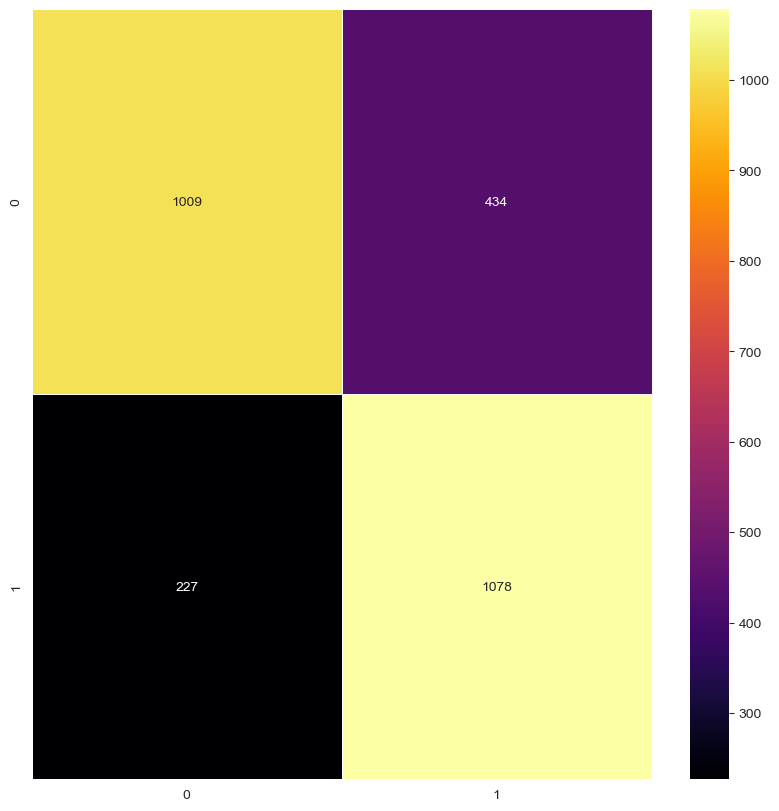

In [119]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(NB_CM, annot=True, linewidths=0.5,linecolor="white", fmt= '.0f',ax=ax, cmap='inferno')
plt.show()

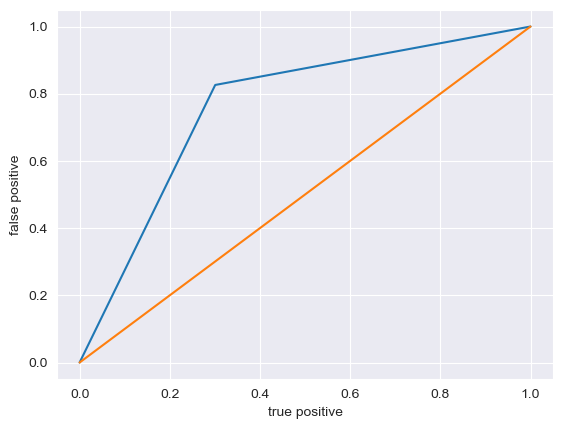

In [64]:
random_probs = [0 for i in range(len(y_test1))]
p_fp, p_tp , _= roc_curve(y_test1, random_probs,pos_label=1) 

tpr,fpr,_=roc_curve(y_test1,y_pred)
plt.plot(tpr,fpr)
plt.plot(p_fp,p_tp)
plt.xlabel("true positive")
plt.ylabel("false positive")
plt.show()

# 2- KNN:

In [65]:
KNN = KNeighborsClassifier(n_neighbors= 5)
KNN.fit(x_train1,y_train1)
y_pred_KNN = KNN.predict(x_test1)
KNN.score(x_test1 , y_test1)

0.7157933042212519

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1443
           1       0.74      0.62      0.68      1305

    accuracy                           0.72      2748
   macro avg       0.72      0.71      0.71      2748
weighted avg       0.72      0.72      0.71      2748



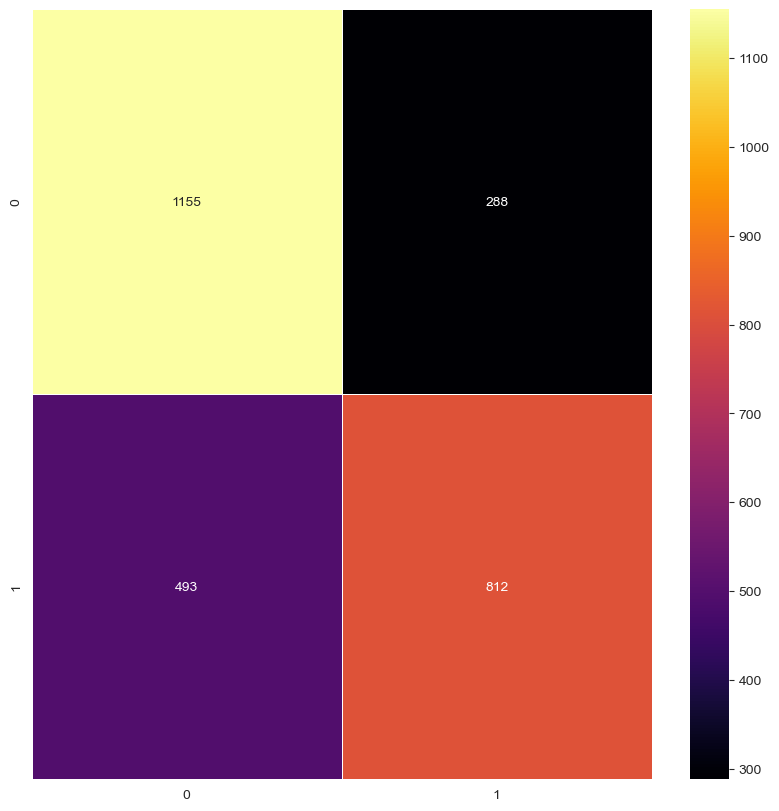

In [121]:
y_pred_knn = KNN.predict(x_test1)
print (classification_report(y_test1,y_pred_knn ))
cm = confusion_matrix(y_test1, y_pred_knn)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="white", fmt= '.0f',ax=ax, cmap='inferno')
plt.show()

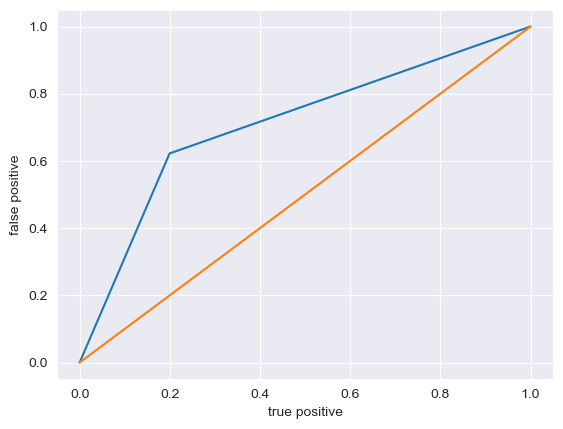

In [67]:
tpr,fpr,_=roc_curve(y_test1,y_pred_KNN)
plt.plot(tpr,fpr)
plt.plot(p_fp,p_tp)
plt.xlabel("true positive")
plt.ylabel("false positive")
plt.show()

# 3- Decision tree:

In [68]:
DT = DecisionTreeClassifier(max_depth= 10,max_features=7) 

In [69]:
DT.fit(x_train1,y_train1)

DecisionTreeClassifier(max_depth=10, max_features=7)

In [70]:
DT.score(x_test1,y_test1)

0.8064046579330422

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1443
           1       0.79      0.80      0.80      1305

    accuracy                           0.81      2748
   macro avg       0.81      0.81      0.81      2748
weighted avg       0.81      0.81      0.81      2748



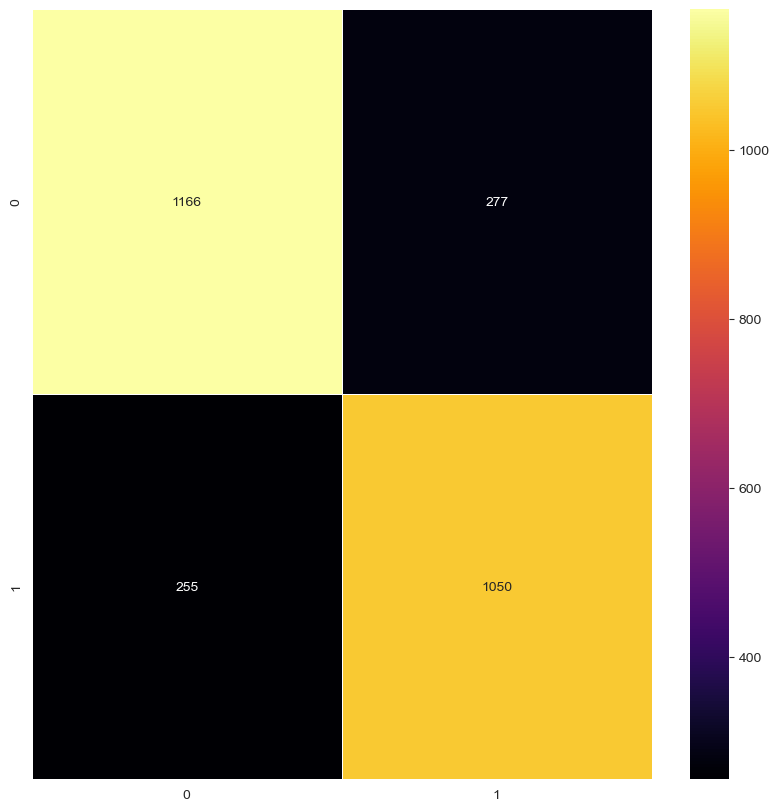

In [122]:
y_pred_DT = DT.predict(x_test1)
print (classification_report(y_test1,y_pred_DT ))
cm = confusion_matrix(y_test1, y_pred_DT)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="white", fmt= '.0f',ax=ax, cmap='inferno')
plt.show()

In [72]:
params =  {
    'min_samples_leaf': [1,2,3,4,5,6],
    'max_depth': [50,60,70,80,90,100,110]
}

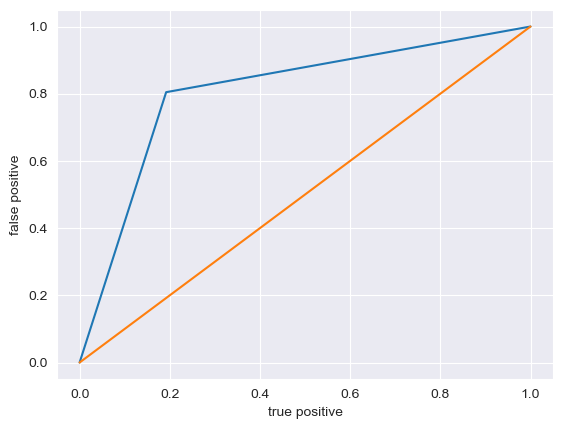

In [73]:
tpr,fpr,_=roc_curve(y_test1,y_pred_DT)
plt.plot(tpr,fpr)
plt.plot(p_fp,p_tp)
plt.xlabel("true positive")
plt.ylabel("false positive")
plt.show()

# 4- Random forest:

In [74]:
RF = RandomForestClassifier(max_features=60, min_samples_split=4)

In [75]:
RF.fit(x_train1,y_train1)

RandomForestClassifier(max_features=60, min_samples_split=4)

In [76]:
RF.score(x_test1,y_test1)

0.8508005822416302

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1443
           1       0.79      0.80      0.80      1305

    accuracy                           0.81      2748
   macro avg       0.81      0.81      0.81      2748
weighted avg       0.81      0.81      0.81      2748



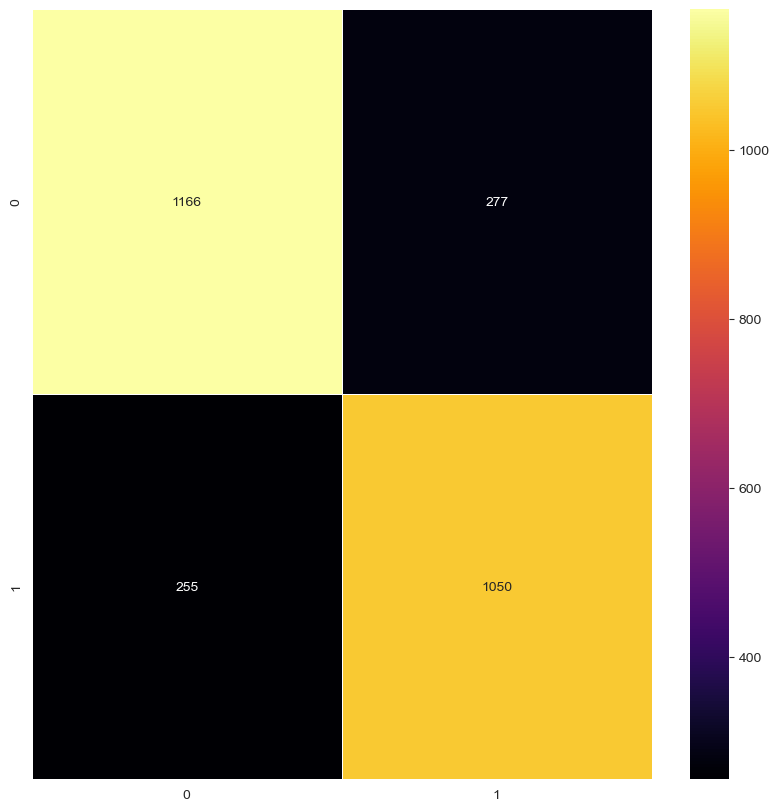

In [123]:
y_pred_RF = DT.predict(x_test1)
print (classification_report(y_test1,y_pred_RF ))
cm = confusion_matrix(y_test1, y_pred_RF)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="white", fmt= '.0f',ax=ax, cmap='inferno')
plt.show()

In [ ]:
grid = GridSearchCV(estimator=RF,
                    param_grid=params,
                    cv=5,
                    n_jobs=1,
                    verbose=2)

In [70]:
grid.fit(x_train1, y_train1)

grid.best_score_, grid.best_params_

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ...................max_depth=50, min_samples_leaf=1; total time=   4.8s
[CV] END ...................max_depth=50, min_samples_leaf=1; total time=   4.7s
[CV] END ...................max_depth=50, min_samples_leaf=1; total time=   4.8s
[CV] END ...................max_depth=50, min_samples_leaf=1; total time=   4.7s
[CV] END ...................max_depth=50, min_samples_leaf=1; total time=   4.9s
[CV] END ...................max_depth=50, min_samples_leaf=2; total time=   4.8s
[CV] END ...................max_depth=50, min_samples_leaf=2; total time=   5.0s
[CV] END ...................max_depth=50, min_samples_leaf=2; total time=   4.8s
[CV] END ...................max_depth=50, min_samples_leaf=2; total time=   4.6s
[CV] END ...................max_depth=50, min_samples_leaf=2; total time=   4.6s
[CV] END ...................max_depth=50, min_samples_leaf=3; total time=   4.4s
[CV] END ...................max_depth=50, min_s

(0.8500762852404644, {'max_depth': 60, 'min_samples_leaf': 4})

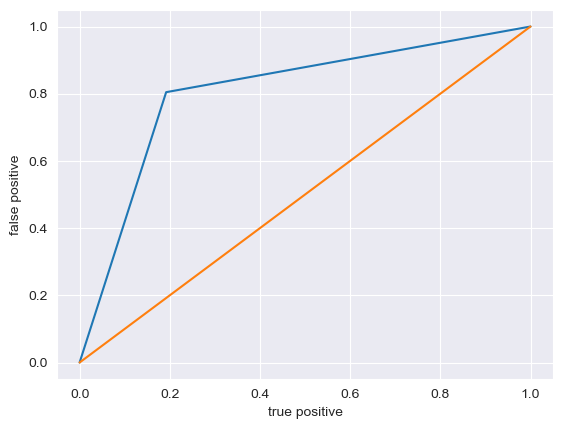

In [78]:
tpr,fpr,_=roc_curve(y_test1,y_pred_RF)
plt.plot(tpr,fpr)
plt.plot(p_fp,p_tp)
plt.xlabel("true positive")
plt.ylabel("false positive")
plt.show()

In [79]:
#auc_score = roc_auc_score(y_test1,y_pred_RF)
#print(auc_score)

# 5- Support vector machine:

In [80]:
SVM = SVC(random_state= 42)

In [81]:
SVM.fit(x_train1,y_train1)

SVC(random_state=42)

In [82]:
SVM.score(x_test1,y_test1)

0.8191411935953421

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1443
           1       0.81      0.81      0.81      1305

    accuracy                           0.82      2748
   macro avg       0.82      0.82      0.82      2748
weighted avg       0.82      0.82      0.82      2748



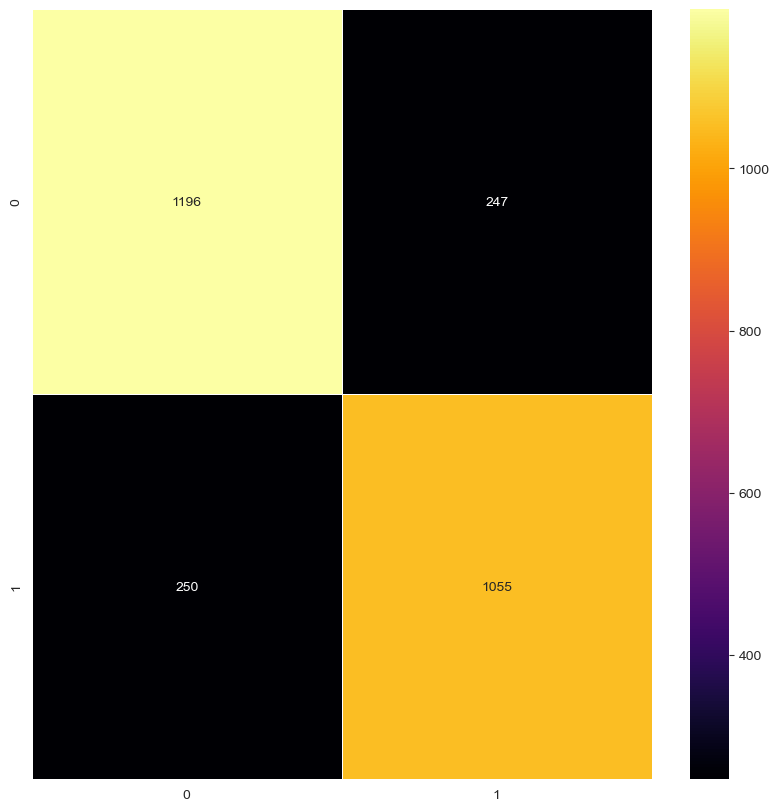

In [124]:
y_pred_SVM = SVM.predict(x_test1)
print (classification_report(y_test1,y_pred_SVM ))
cm = confusion_matrix(y_test1, y_pred_SVM)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="white", fmt= '.0f',ax=ax, cmap='inferno')
plt.show()

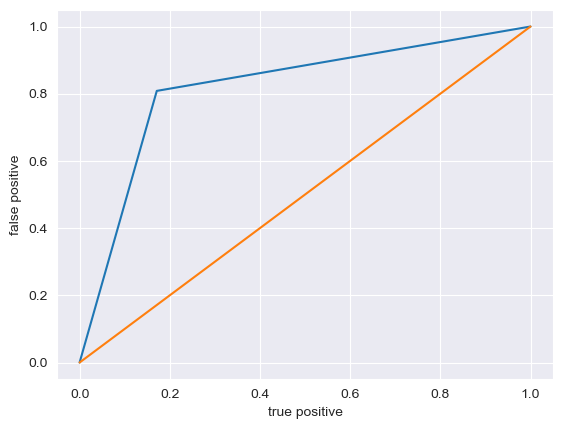

In [84]:
tpr,fpr,_=roc_curve(y_test1,y_pred_SVM)
plt.plot(tpr,fpr)
plt.plot(p_fp,p_tp)
plt.xlabel("true positive")
plt.ylabel("false positive")
plt.show()

# 6- Logistic regrssion:

In [85]:
LR =Pipeline([
    ('feature_scaling', StandardScaler()),
    ('logistic_regression', LogisticRegression(random_state=0))
])
eval_model(LR, x_train1, y_train1, x_test1, y_test1)

(0.7979614124499453, 0.8082241630276564)

In [86]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
acc_train_values = []
acc_test_values = []

for C in C_values:
    model = Pipeline([
        ('feature_scaling', StandardScaler()),
        ('logistic_regression', LogisticRegression(C=C, random_state=0))
    ])
    acc_train, acc_test = eval_model(LR, x_train1, y_train1, x_test1, y_test1)
    acc_train_values.append(acc_train)
    acc_test_values.append(acc_test)

results = pd.DataFrame({
    'C': C_values,
    'acc_train': acc_train_values,
    'acc_test': acc_test_values
})

results

C  acc_train  acc_test
0      0.0001   0.797961  0.808224
1      0.0010   0.797961  0.808224
2      0.0100   0.797961  0.808224
3      0.1000   0.797961  0.808224
4      1.0000   0.797961  0.808224
5     10.0000   0.797961  0.808224
6    100.0000   0.797961  0.808224
7   1000.0000   0.797961  0.808224
8  10000.0000   0.797961  0.808224

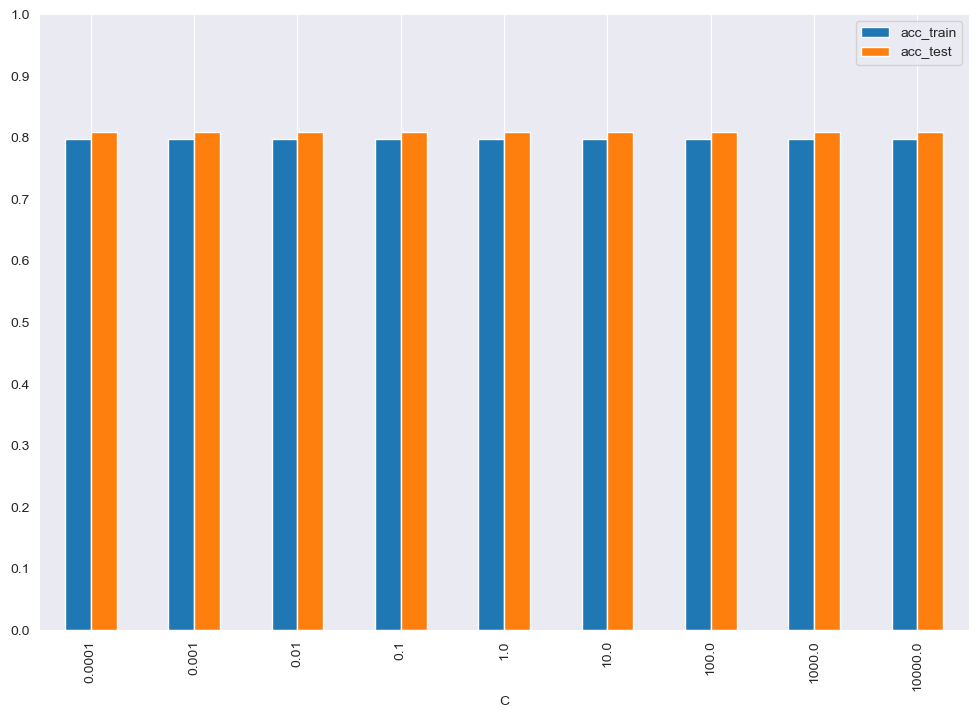

In [87]:
results.plot.bar(x='C', y=['acc_train', 'acc_test'], figsize=(12, 8))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1443
           1       0.81      0.78      0.79      1305

    accuracy                           0.81      2748
   macro avg       0.81      0.81      0.81      2748
weighted avg       0.81      0.81      0.81      2748



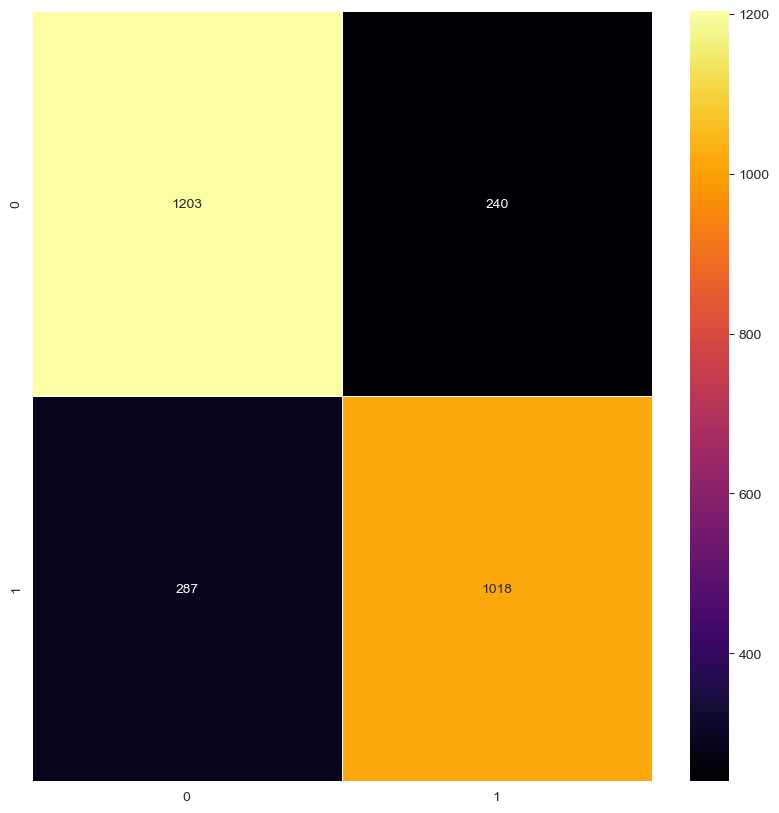

In [125]:
y_pred_LR = LR.predict(x_test1)
print (classification_report(y_test1,y_pred_LR ))
cm = confusion_matrix(y_test1, y_pred_LR)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="white", fmt= '.0f',ax=ax, cmap='inferno')
plt.show()

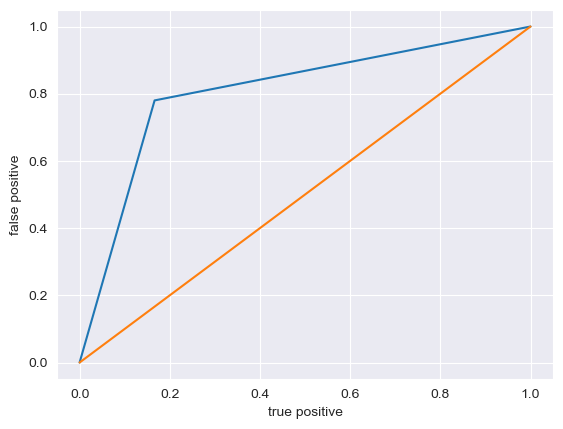

In [89]:
tpr,fpr,_=roc_curve(y_test1,y_pred_LR)
plt.plot(tpr,fpr)
plt.plot(p_fp,p_tp)
plt.xlabel("true positive")
plt.ylabel("false positive")
plt.show()

# feature selection

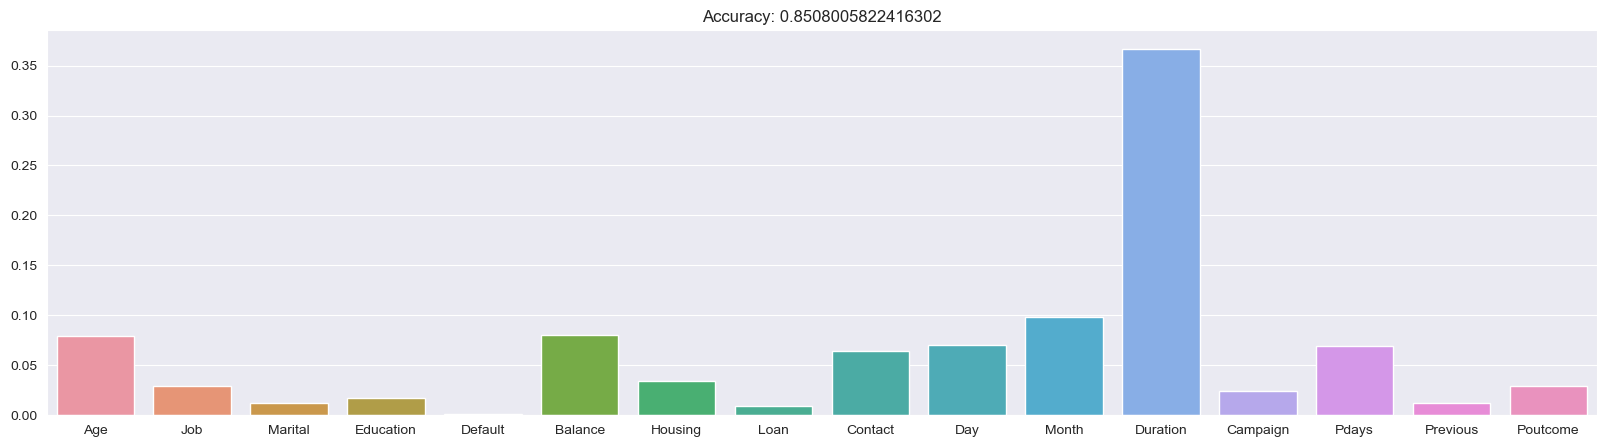

In [90]:
plt.figure(figsize=(20, 5))
fi = pd.Series(RF.feature_importances_, index=X1.columns[:])
sns.barplot(x=fi.index, y=fi.values)
score = RF.score(x_test1, y_test1)
plt.title('Accuracy: ' + str(score))
plt.show()

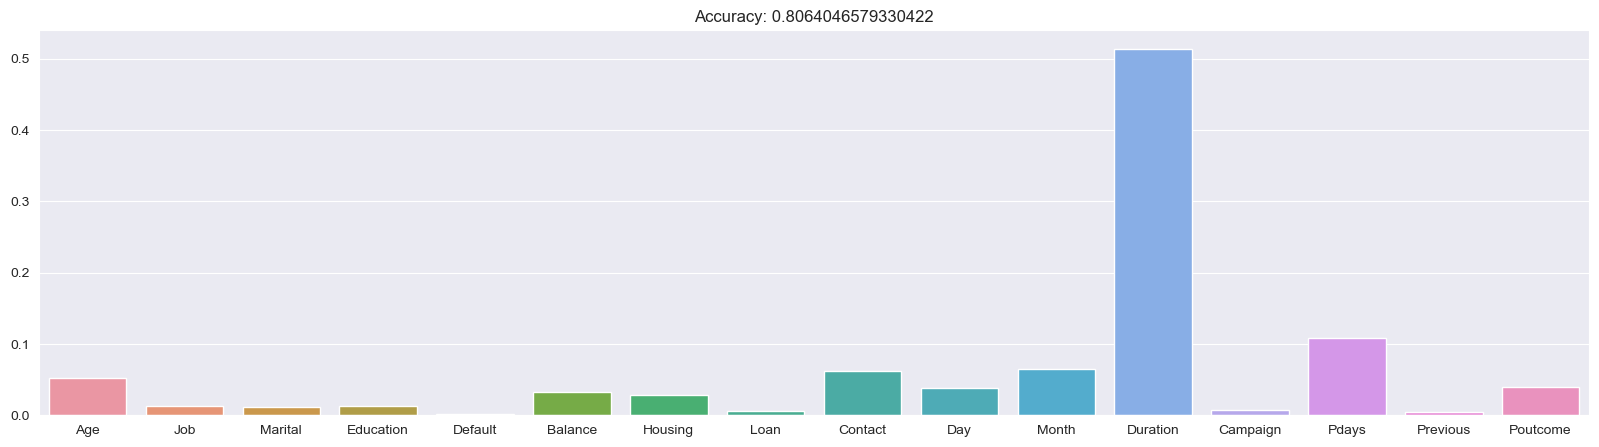

In [91]:
plt.figure(figsize=(20, 5))
fi = pd.Series(DT.feature_importances_, index=X1.columns[:])
sns.barplot(x=fi.index, y=fi.values)
score = DT.score(x_test1, y_test1)
plt.title('Accuracy: ' + str(score))
plt.show()

# Clustering

In [98]:
df

Age          Job  Marital  Education Default  Balance Housing Loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        Contact  Day Month  Duration  Campaign  Pdays  Previous Poutcome  \
0       unknown    5   may      1042         1     -1         0  unknown   
1       unknown    5   may      1467         1     -1         0  unknown   
2       unknown    5   may      1389         1     -1         0  unknown   
3       unknown    5   may       579         1     -1         0  unknown   
4       unknown    5   may       673         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      Deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[10989 rows x 17 columns]

In [96]:
df_c = df.drop(['Deposit'],axis =1)

Text(0, 0.5, 'Balance')

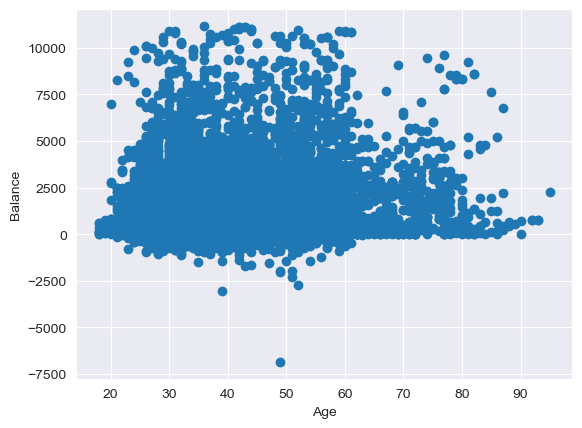

In [140]:
plt.scatter(df["Age"], df["Balance"])
plt.xlabel("Age")
plt.ylabel("Balance")

In [156]:
km = KMeans(n_clusters=5)
y_p_c = km.fit_predict(df_c[["Age","Balance"]])
y_p_c

array([1, 2, 0, ..., 2, 2, 2])

In [157]:
df_c["cluster"] = y_p_c 
df_c.head()

Age         Job  Marital  Education Default  Balance Housing Loan  Contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   Day Month  Duration  Campaign  Pdays  Previous Poutcome  cluster  
0    5   may      1042         1     -1         0  unknown        1  
1    5   may      1467         1     -1         0  unknown        2  
2    5   may      1389         1     -1         0  unknown        0  
3    5   may       579         1     -1         0  unknown        1  
4    5   may       673         2     -1         0  unknown        2

In [158]:
km.cluster_centers_

array([[  41.89612465, 1323.19656412],
       [  43.80398406, 3018.17768924],
       [  39.95558336,  193.9906162 ],
       [  45.28846154, 8758.48461538],
       [  44.2287695 , 5343.2270364 ]])

Text(0, 0.5, 'Balance')

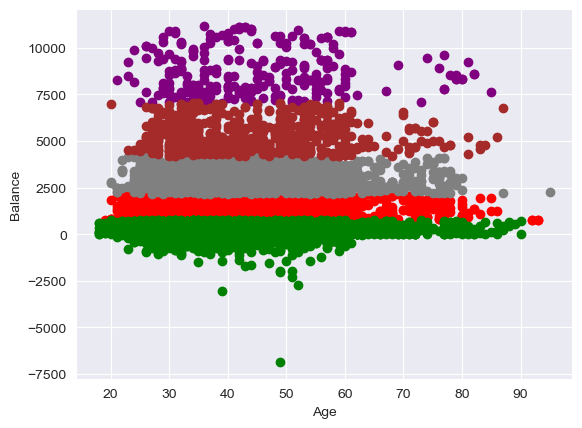

In [161]:
df_c1 = df_c[df_c.cluster == 0]
df_c2 = df_c[df_c.cluster == 1]
df_c3 = df_c[df_c.cluster == 2]
df_c4 = df_c[df_c.cluster == 3]
df_c5 = df_c[df_c.cluster == 4]
# df_c6 = df_c[df_c.cluster == 5]
# df_c7 = df_c[df_c.cluster == 6]
# df_c8 = df_c[df_c.cluster == 7]
# df_c9 = df_c[df_c.cluster == 8]

plt.scatter(df_c1["Age"], df_c1["Balance"],color = "red")
plt.scatter(df_c2["Age"], df_c2["Balance"] ,color = "gray")
plt.scatter(df_c3["Age"], df_c3["Balance"],color = "green")
plt.scatter(df_c4["Age"], df_c4["Balance"],color = "purple")
plt.scatter(df_c5["Age"], df_c5["Balance"],color = "brown")
# plt.scatter(df_c6["Age"], df_c6["Balance"],color = "gray")
# plt.scatter(df_c7["Age"], df_c7["Balance"],color = "brown")
# plt.scatter(df_c8["Age"], df_c8["Balance"],color = "yellow")
# plt.scatter(df_c9["Age"], df_c9["Balance"],color = "orange")
           
            
plt.xlabel("Age")
plt.ylabel("Balance")